In [1]:
# libraries and functions
import sys
sys.path.append("../functions")
from import_auxiliary import import_data, array_persev_computation

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans

# path
path_CM_red = "../data/compliant_matrix.json"
path_CM_yellow = "../data/non_compliant_matrix.json"
path_Nij = "../data/Nij.json"

# list of names
function_types = ['lin', 'centerlin', 'startendlin', 'startlin', 'endlin']

# function of the logisitic rate
def logistic(x, k, x0):
    return 1 / (1 + np.exp(-k * (x - x0)))

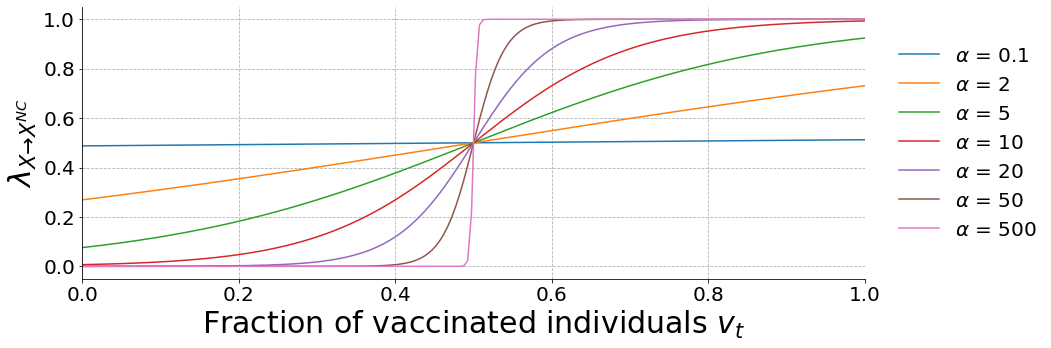

In [2]:
# Plot rate for different slopes

# Create a grid with subplots
fig, ax = plt.subplots(figsize=(15, 5), gridspec_kw={'right': 0.85})

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

xs = np.linspace(0, 1, 200)
for x0 in [0.5]:
    for k in [0.1, 2, 5, 10, 20, 50, 500]:
        fs = [logistic(x, k, x0) for x in xs]
        ax.plot(xs, fs, label=fr'$\alpha$ = ${k}$')


ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.margins(x=0, tight=True)
ax.grid(linestyle='--')
ax.set_xlabel(r'Fraction of vaccinated individuals $v_t$', fontsize = 30)
ax.set_ylabel(r'$\lambda_{X\to X^{NC}}$', fontsize = 30)

# Place the legend on the right
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False, fontsize = 20)

plt.show()

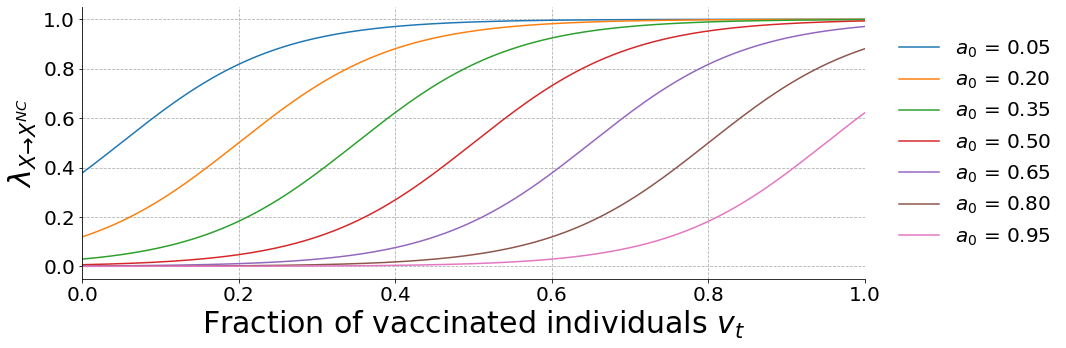

In [3]:
# Plot rate for different midpoints

# Create a grid with subplots
fig, ax = plt.subplots(figsize=(15, 5), gridspec_kw={'right': 0.85})

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

xs = np.linspace(0, 1, 200)
for k in [10]:
    for x0 in [0.05, 0.20, 0.35, 0.50, 0.65, 0.80, 0.95]:
        fs = [logistic(x, k, x0) for x in xs]
        ax.plot(xs, fs, label=r'$a_0$ = ' + f'{x0:.2f}')

ax.margins(x=0, tight=True)
ax.grid(linestyle='--')
ax.set_xlabel(r'Fraction of vaccinated individuals $v_t$', fontsize = 30)
ax.set_ylabel(r'$\lambda_{X\to X^{NC}}$', fontsize = 30)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

# Place the legend on the right
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False, fontsize = 20)

plt.show()

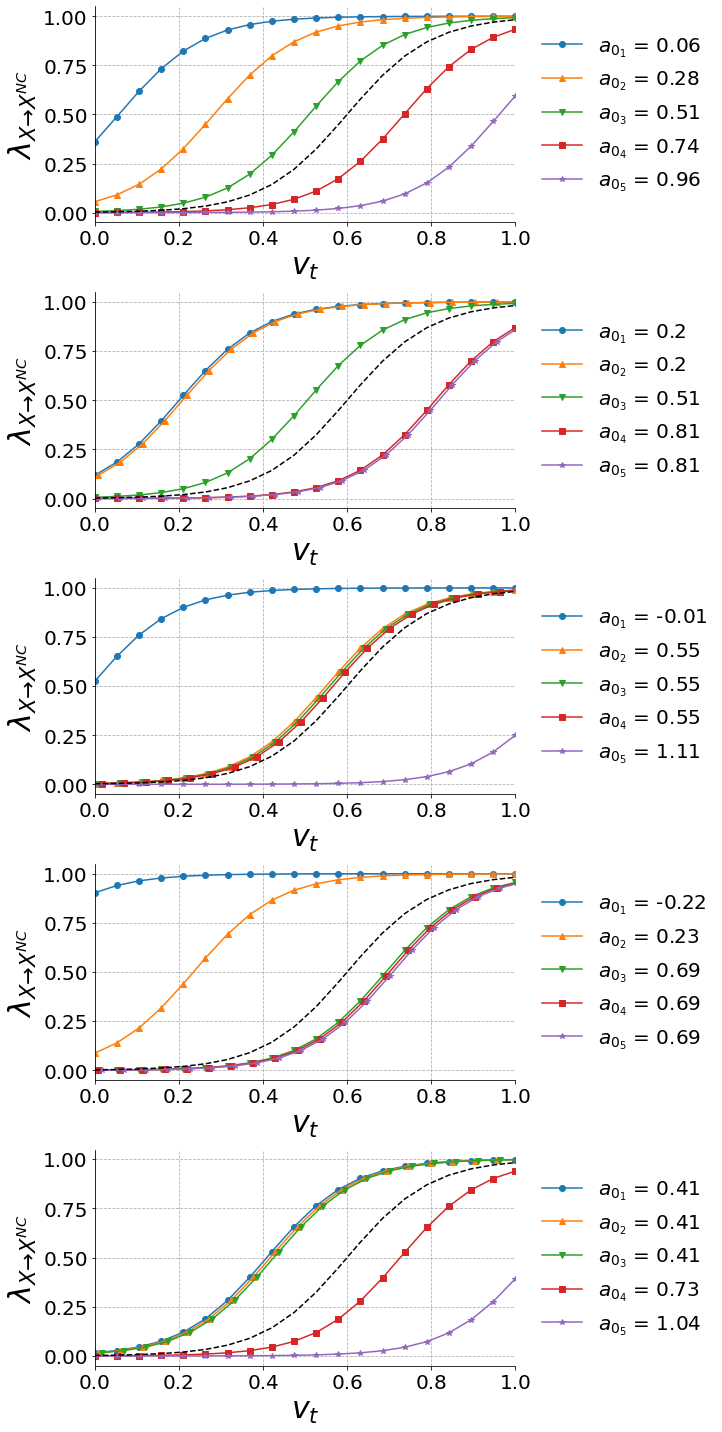

In [4]:
# Plot rate for different functions

# import data
Italy_dict = import_data(path_CM_red, path_CM_yellow, path_Nij)

a0 = 0.6
sigma_a0 = 0.05

fun_dict = {'lin': 'Linear', 'centerlin': 'Central Linear', 'startendlin': 'Start End Linear', 'startlin': 'Start Linear', 'endlin': 'End Linear'}

style_plot_list = ['o', '^', 'v', 's', '*']

fig, axs = plt.subplots(5, 1, figsize=(10, 20))

for fun_type, ax in zip(function_types, axs.flatten()):

    a0_vec = array_persev_computation(Italy_dict['Nij'], a0, sigma_a0, fun_type, grow=True)
    xs = np.linspace(0, 1, 20)
    labels = [r'$a_{0_1}$', r'$a_{0_2}$', r'$a_{0_3}$', r'$a_{0_4}$', r'$a_{0_5}$']
    for x0, i in zip(a0_vec, range(len(a0_vec))):
        if i == 0:
            fs = [logistic(x, 10, x0) for x in xs]
            ax.plot(xs, fs, label= labels[i] + f' = {round(x0,2)}', marker = style_plot_list[i])
        elif x0 == a0_vec[i-1]:
            fs = [logistic(x, 10, x0) for x in xs]
            if (x0 == a0_vec[i-1]) and (x0 == a0_vec[i-2]):
                tr = mtrans.offset_copy(ax.transData, fig=fig, x=+7, y=0.0, units='points')
            else: 
                tr = mtrans.offset_copy(ax.transData, fig=fig, x=+3.5, y=0.0, units='points')
            ax.plot(xs, fs, label= labels[i] + f' = {round(x0,2)}', transform = tr, marker = style_plot_list[i])
        else:
            fs = [logistic(x, 10, x0) for x in xs]
            ax.plot(xs, fs, label= labels[i] + f' = {round(x0,2)}', marker = style_plot_list[i])

    ax.plot(xs, [logistic(x, 10, a0) for x in xs], color='black', linestyle='dashed')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.margins(x=0, tight=True)
    ax.grid(linestyle='--')

    ax.set_xlabel(r'$v_t$', fontsize = 30)
    ax.set_ylabel(r'$\lambda_{X\to X^{NC}}$', fontsize=30)

    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)

    legend = ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False, fontsize = 20)

plt.tight_layout()
plt.show()